In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data file
df = pd.read_csv('CO2.new.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.999038,0.953224,0.915661,0.916485,0.917093,0.936570,...,1.021548,0.979352,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.478144,0.530016,0.568305,0.523529,0.470888,0.501681,...,0.472077,0.476789,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137


In [3]:
# Looking for Indicator names that are not CO2 emissions (metric tons per capita)
Indicator_er=0
for i in df['Indicator Name']:
    if i != 'CO2 emissions (metric tons per capita)':
        Indicator_er +=1
print("Number of other Indicators",Indicator_er,'\n')
# So, all of them are CO2 emissions (metric tons per capita)

# Looking at the info
print(df.info())

Number of other Indicators 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1990            233 non-null    float64
 5   1991            234 non-null    float64
 6   1992            237 non-null    float64
 7   1993            237 non-null    float64
 8   1994            237 non-null    float64
 9   1995            238 non-null    float64
 10  1996            238 non-null    float64
 11  1997            238 non-null    float64
 12  1998            237 non-null    float64
 13  1999            237 non-null    float64
 14  2000            238 non-null    float64
 15  2001            238 non-null    float64
 16  2002            239 non-null    float64
 17  2003

In [4]:
# Droping unneccery columns
df_new= df.drop('Country Name', axis=1)
df_new= df_new.drop('Country Code', axis=1)
df_new= df_new.drop('Indicator Code', axis=1)
df_new= df_new.drop('Indicator Name', axis=1)

#fill Nan values
df_new= df_new.fillna(axis=1, method= 'bfill')

#Droping rows that all of their values are zeros
df_new=df_new.dropna(axis=0, how='all')

#Droping duplicate columns
df_new= df_new.T.drop_duplicates().T

# Counting the number of zeros in all columns of Dataframe before filling
print("Number of zeros")
for column_name in df_new.columns:
    column = df_new[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

print("\n")

#filling 0 values 
for column_name in df_new.columns:    
    df_new[column_name].replace(to_replace=0, method='bfill', inplace=True)

# Counting the number of zeros in all columns of Dataframe after filling
print("Number of zeros after filling. (Just checking)")
for column_name in df_new.columns:
    column = df_new[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

# Saving this new data into a csv file
df_new.to_csv('raw_data_new.csv')

Number of zeros
Count of zeros in column  1990  is :  0
Count of zeros in column  1991  is :  0
Count of zeros in column  1992  is :  0
Count of zeros in column  1993  is :  0
Count of zeros in column  1994  is :  0
Count of zeros in column  1995  is :  0
Count of zeros in column  1996  is :  1
Count of zeros in column  1997  is :  0
Count of zeros in column  1998  is :  0
Count of zeros in column  1999  is :  0
Count of zeros in column  2000  is :  0
Count of zeros in column  2001  is :  0
Count of zeros in column  2002  is :  0
Count of zeros in column  2003  is :  0
Count of zeros in column  2004  is :  0
Count of zeros in column  2005  is :  0
Count of zeros in column  2006  is :  0
Count of zeros in column  2007  is :  0
Count of zeros in column  2008  is :  0
Count of zeros in column  2009  is :  0
Count of zeros in column  2010  is :  0
Count of zeros in column  2011  is :  0
Count of zeros in column  2012  is :  0
Count of zeros in column  2013  is :  0
Count of zeros in column

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 1 to 265
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    239 non-null    float64
 1   1991    239 non-null    float64
 2   1992    239 non-null    float64
 3   1993    239 non-null    float64
 4   1994    239 non-null    float64
 5   1995    239 non-null    float64
 6   1996    239 non-null    float64
 7   1997    239 non-null    float64
 8   1998    239 non-null    float64
 9   1999    239 non-null    float64
 10  2000    239 non-null    float64
 11  2001    239 non-null    float64
 12  2002    239 non-null    float64
 13  2003    239 non-null    float64
 14  2004    239 non-null    float64
 15  2005    239 non-null    float64
 16  2006    239 non-null    float64
 17  2007    239 non-null    float64
 18  2008    239 non-null    float64
 19  2009    239 non-null    float64
 20  2010    239 non-null    float64
 21  2011    239 non-null    float64
 22  20

In [6]:
df_new

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,0.999038,0.953224,0.915661,0.916485,0.917093,0.936570,0.947393,0.967836,0.967182,0.904871,...,1.021548,0.979352,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618
2,0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,0.056827,0.052691,0.040157,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
3,0.478144,0.530016,0.568305,0.523529,0.470888,0.501681,0.564390,0.549638,0.514868,0.511254,...,0.472077,0.476789,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923
4,0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,1.086637,1.091825,1.109860,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137
5,1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,0.612367,0.466921,0.572154,0.955359,...,1.527624,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.552836,0.609756,0.604266,0.658221,0.592807,0.705675,0.759501,0.755528,0.867860,0.864025,...,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.586830,1.478626,1.522124
262,0.567037,0.690937,0.704793,0.627105,0.653256,0.706081,0.698158,0.728608,0.757433,0.830912,...,1.098258,0.963978,0.858491,1.106688,1.062211,0.511362,0.399364,0.359622,0.341068,0.380633
263,6.729799,6.424622,6.175430,6.219194,6.215847,6.378790,6.489192,6.723589,6.787424,6.279186,...,8.304084,7.869816,8.077958,8.138264,8.212241,7.669938,7.563739,7.641675,7.515679,7.507736
264,0.340930,0.349232,0.337224,0.289956,0.241270,0.234153,0.188442,0.238601,0.219937,0.173560,...,0.195502,0.217497,0.278601,0.284058,0.304550,0.312355,0.325115,0.404068,0.445489,0.380717


In [7]:
# One of the row
df_new.loc[[213]]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
213,0.101037,0.097608,0.09321,0.087481,0.085452,0.080089,0.074193,0.069303,0.063145,0.058455,...,0.052309,0.050904,0.049546,0.049756,0.048422,0.047111,0.046526,0.045239,0.043976,0.044681


In [8]:
# Creating a list of all CO2 values for all years
index_X= df_new.index

ind=0
X= np.zeros([239,29])

for i in index_X:
    X[ind]= df_new.loc[i][0:29]
    ind+=1
      
print(X)
print(X.shape)

[[0.99903782 0.9532243  0.91566057 ... 0.94840981 0.93792572 0.91750748]
 [0.19174511 0.16768158 0.09595774 ... 0.14978933 0.13169456 0.1632953 ]
 [0.47814428 0.53001602 0.56830539 ... 0.49940456 0.48313952 0.48645613]
 ...
 [6.72979859 6.42462177 6.17542994 ... 7.56373949 7.64167509 7.51567861]
 [0.34092964 0.34923221 0.33722439 ... 0.32511484 0.40406778 0.44548913]
 [1.58544398 1.71332144 1.69441598 ... 0.78544084 0.72629707 0.85741127]]
(239, 29)


In [9]:
# Values for 2019 for all countries
y=df_new.loc[:,"2019"]
print(y)

1      0.913618
2      0.159824
3      0.493923
4      0.792137
5      1.692248
         ...   
260    1.522124
262    0.380633
263    7.507736
264    0.380717
265    0.802979
Name: 2019, Length: 239, dtype: float64


In [10]:
# df_plt is traspose of df_new
df_plt = pd.read_csv('CO2_transpose.csv')
df_plt

,Year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1990,NaN,0.999038,0.191745,0.478144,0.553662,1.819542,7.521832,2.857037,30.195189,...,NaN,0.284311,0.477571,3.906255,0.552836,NaN,0.567037,6.729799,0.340930,1.585444
1,1991,NaN,0.953224,0.167682,0.530016,0.544539,1.242810,7.235379,2.790657,31.778496,...,NaN,0.285151,0.464444,3.868547,0.609756,NaN,0.690937,6.424622,0.349232,1.713321
2,1992,NaN,0.915661,0.095958,0.568305,0.543557,0.683700,6.963079,2.974365,29.080926,...,NaN,0.293580,0.386658,3.814152,0.604266,NaN,0.704793,6.175430,0.337224,1.694416
3,1993,NaN,0.916485,0.084721,0.523529,0.708984,0.638307,6.724178,3.118309,29.275678,...,NaN,0.335268,0.375603,3.780707,0.658221,NaN,0.627105,6.219194,0.289956,1.539741
4,1994,NaN,0.917093,0.075546,0.470888,0.836804,0.645355,6.541579,3.221163,30.849333,...,NaN,0.362248,0.365568,3.744687,0.592807,NaN,0.653256,6.215847,0.241270,1.417186
5,1995,NaN,0.936570,0.068468,0.501681,0.912141,0.605436,6.733479,3.219158,31.125018,...,NaN,0.419167,0.416268,3.794248,0.705675,NaN,0.706081,6.378790,0.234153,1.356619
6,1996,NaN,0.947393,0.062588,0.564390,1.072168,0.612367,6.991595,3.257243,30.928026,...,NaN,0.460505,0.524106,3.818985,0.759501,NaN,0.698158,6.489192,0.188442,1.287559
7,1997,NaN,0.967836,0.056827,0.549638,1.086637,0.466921,7.307441,3.341023,30.486333,...,NaN,0.529474,0.514530,3.830205,0.755528,NaN,0.728608,6.723589,0.238601,1.186793
8,1998,NaN,0.967182,0.052691,0.514868,1.091825,0.572154,7.639539,3.288231,29.663581,...,NaN,0.582085,0.449471,3.798067,0.867860,NaN,0.757433,6.787424,0.219937,1.197745
9,1999,NaN,0.904871,0.040157,0.511254,1.109860,0.955359,7.923192,3.262101,28.887108,...,NaN,0.587202,0.496527,3.765047,0.864025,NaN,0.830912,6.279186,0.173560,1.338101


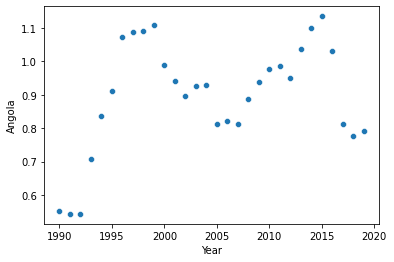

In [11]:
# Change the country to see the plot of them
country=("Angola")
y_plt=df_plt.loc[:,country]

sns.scatterplot(data = df_plt, x = "Year", y = y_plt)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [22]:
# X_train is the values for 192 countries from 1990 to 2018
X_train= X[0:192]

# X_train is the values for other countries from 1990 to 2018
X_test= X[192:]

# y_train is the values for 192 countries in 2019
y_train= y[0:192]

# y_train is the values for other countries in 2019
y_test= y[192:]

print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (192, 29) y_train.shape (192,)
X_test.shape (47, 29) y_test.shape (47,)


In [15]:
pipe= Pipeline([
    ("scale", StandardScaler()),
    ("model", SVR(kernel="poly", C=10000, gamma="auto",degree=1 , epsilon=0.1, coef0=1))
])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', SVR(C=10000, coef0=1, degree=1, gamma='auto', kernel='poly'))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': SVR(C=10000, coef0=1, degree=1, gamma='auto', kernel='poly'),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__C': 10000,
 'model__cache_size': 200,
 'model__coef0': 1,
 'model__degree': 1,
 'model__epsilon': 0.1,
 'model__gamma': 'auto',
 'model__kernel': 'poly',
 'model__max_iter': -1,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [16]:
param_grid_SVR = [{
    'model__degree': [1,2,3,4,5],
    'model__epsilon': [0.1, 0.2]
}]

mod= GridSearchCV(estimator = pipe ,
                     param_grid = param_grid_SVR,
                     cv=5,
                     refit=True)

mod.fit(X_train ,y_train)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__degree,param_model__epsilon,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.917256,2.396371,0.010873,0.021250,1,0.1,"{'model__degree': 1, 'model__epsilon': 0.1}",0.991789,0.982176,0.990667,0.991245,0.997261,0.990627,0.004841,1
1,5.986650,3.042949,0.001661,0.002161,1,0.2,"{'model__degree': 1, 'model__epsilon': 0.2}",0.989651,0.959907,0.991733,0.987744,0.997102,0.985228,0.013041,2
2,2.939747,0.706216,0.001158,0.000706,2,0.1,"{'model__degree': 2, 'model__epsilon': 0.1}",0.976262,0.985385,0.859726,0.079025,0.279684,0.636016,0.380811,4
3,0.148055,0.065644,0.001973,0.002431,2,0.2,"{'model__degree': 2, 'model__epsilon': 0.2}",0.964382,0.932083,0.975929,0.806898,0.793629,0.894584,0.078455,3
4,0.403736,0.099360,0.002008,0.002504,3,0.1,"{'model__degree': 3, 'model__epsilon': 0.1}",0.637730,0.990640,0.063795,0.778231,-4.110020,-0.327925,1.915848,6
5,0.046267,0.008086,0.000873,0.000870,3,0.2,"{'model__degree': 3, 'model__epsilon': 0.2}",0.590922,0.935670,0.966487,0.988075,-0.575121,0.581207,0.596123,5
6,0.275264,0.102444,0.000623,0.001247,4,0.1,"{'model__degree': 4, 'model__epsilon': 0.1}",-1.038891,0.988749,-0.561664,0.579836,-191.897662,-38.385926,76.759396,10
7,0.057165,0.022492,0.002431,0.002972,4,0.2,"{'model__degree': 4, 'model__epsilon': 0.2}",0.844136,0.967632,0.483937,0.928193,-38.607713,-7.076763,15.766402,8
8,0.172345,0.053100,0.002748,0.002705,5,0.1,"{'model__degree': 5, 'model__epsilon': 0.1}",-0.928746,0.990899,-9.437265,-13.829436,-8.743989,-6.389707,5.558332,7
9,0.037671,0.032417,0.000200,0.000399,5,0.2,"{'model__degree': 5, 'model__epsilon': 0.2}",0.866427,0.888508,-0.870996,-12.867151,-160.235270,-34.443696,63.105250,9


In [17]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 SVR(C=10000, coef0=1, degree=1, gamma='auto', kernel='poly'))])

In [20]:
# Score for X_test and y_test
print("Score: ",pipe.score(X_test, y_test))

# Prediction
pred= pipe.predict(X_test)
data= pd.DataFrame(pred)

# Actual y values
index=0
y_test_n= np .zeros(47)
for i in y_test:
    y_test_n[index]= i
    index+=1
    
data.insert(1, "actual values (y)", y_test_n, allow_duplicates = True)
data = data.rename(columns={0: 'Predicted values'})
pd.DataFrame(data)

Score:  0.9969666598884905


,Predicted values,actual values (y)
0,6.354343,6.616047
1,0.752910,0.743689
2,0.158471,0.153678
3,0.753376,0.744175
4,5.540394,5.629670
5,0.721232,0.697519
6,4.379652,4.558254
7,5.656775,5.698416
8,6.587861,6.512209
9,3.408181,3.405038


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [23]:
# X_train is the values for 144 countries from 1990 to 2018
X_train= X[0:144]

# X_cv is the values for 48 countries from 1990 to 2018
X_cv= X[144:192]

# X_test is the values for 47 countries from 1990 to 2018
X_test= X[192:]

# y_train is the values for 144 countries in 2019
y_train= y[0:144]

# y_cv is the values for 48 countries in 2019
y_cv= y[144:192]

# y_test is the values for 47 countries in 2019
y_test= y[192:]

print("X_train.shape", X_train.shape, "X_cv.shape", X_cv.shape, "X_test.shape", X_test.shape,)
print("y_train.shape", y_train.shape, "y_cv.shape", y_cv.shape, "y_test.shape", y_test.shape)

X_train.shape (144, 29) X_cv.shape (48, 29) X_test.shape (47, 29)
y_train.shape (144,) y_cv.shape (48,) y_test.shape (47,)


In [24]:
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.           
    """
    m = y.shape[0]
    err = 0.0
    for i in range(m):
 
        a= (yhat[i][0]-y[i])**2
        err += a
    err= err/(2*m)
 
    
    return(err)

In [25]:
tf.random.set_seed(1234)
model = Sequential(
    [ 
        Dense(5, activation= 'relu', name= "L1"),
        Dense(5, activation= 'relu', name= "L2"),
        Dense(1, activation= 'relu', name= "L3")

    ], name="First_model"
)
model.compile(

    loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),

)

In [26]:
model.fit(
    X_train, y_train,
    epochs=100
)

Epoch 1/100
5/5 [==============================] - 2s 7ms/step - loss: 4.4598
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 4.5899
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 1.8589
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 2.0133
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 1.3053
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 1.1145
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 1.0270
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6418
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6270
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9571
Epoch 11/100
5/5 [==============================] - 0s 10ms/step - loss: 0.4803
Epoch 12/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5244
Epoch 13/100
5/5 [==============================] - 0s 9ms/s

In [27]:
model.summary()

Model: "First_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 5)                 150       
                                                                 
 L2 (Dense)                  (None, 5)                 30        
                                                                 
 L3 (Dense)                  (None, 1)                 6         
                                                                 
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_predict_train = model.predict(X_train)
model_predict_cv = model.predict(X_cv)

# y_train values
index=0
y_train_new=np.zeros(144)
for i in y_train:
    y_train_new[index]= i
    index+=1


# y_cv values
index=0
y_cv_new=np.zeros(48)
for i in y_cv:
    y_cv_new[index]= i
    index+=1

    
err_train= eval_mse(y_train_new, model_predict_train )
err_cv= eval_mse(y_cv_new, model_predict_cv )

print(f"error, training,model: {err_train:0.3f}")
print(f"error, cv, model: {err_cv:0.3f}")

2/2 [==============================] - 0s 0s/step
error, training,model: 0.082
error, cv, model: 0.138


In [29]:
# Name of countries for y_test
ind= df_new.index

countries=[]

for i in ind[192:]:
    countries.append(list(df_plt.columns)[i+1])


In [30]:
model_predict_test= model.predict(X_test)
data= pd.DataFrame(model_predict_test)

data.insert(1, "Country Name", countries, allow_duplicates = False)
data = data.rename(columns={0: 'Predicted values for 2019'})
pd.DataFrame(data)

2/2 [==============================] - 0s 16ms/step


,Predicted values for 2019,Country Name
0,5.445557,Serbia
1,0.857822,Sub-Saharan Africa (excluding high income)
2,0.270751,South Sudan
3,0.858239,Sub-Saharan Africa
4,5.704135,Small states
5,0.774450,Sao Tome and Principe
6,5.433128,Suriname
7,5.118701,Slovak Republic
8,6.089664,Slovenia
9,3.718755,Sweden
